In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/tddagdas/opt/anaconda3/envs/Main/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_login = pd.read_json('logins.json')

In [3]:
df_login.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
df_login.shape

(93142, 1)

In [5]:
df_login.isnull().sum()

login_time    0
dtype: int64

In [6]:
print("Min login: ", min(df_login["login_time"]))
print("Max login: ", max(df_login["login_time"]), '\n')

print("All login: ", len(df_login))

Min login:  1970-01-01 20:12:16
Max login:  1970-04-13 18:57:38 

All login:  93142


In [7]:
# set index 
df_login.set_index('login_time', inplace=True) 


In [8]:
# each separate timestamp as 1 count
df_login['count'] = 1

In [9]:
# aggregate by 15-min intervals
df_15_min = df_login.resample('15T').sum() 
df_15_min.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


Text(0, 0.5, 'count')

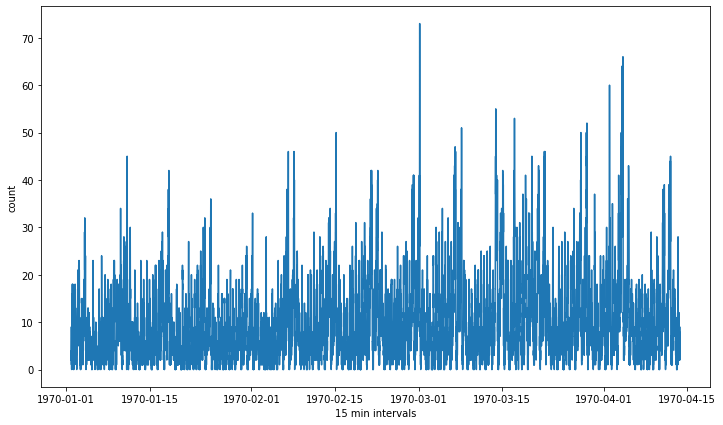

In [10]:
#plot 15 min intervals

plt.figure(figsize=(12,7))
plt.plot(df_15_min)
plt.xlabel('15 min intervals')
plt.ylabel('count')


Text(0, 0.5, 'count')

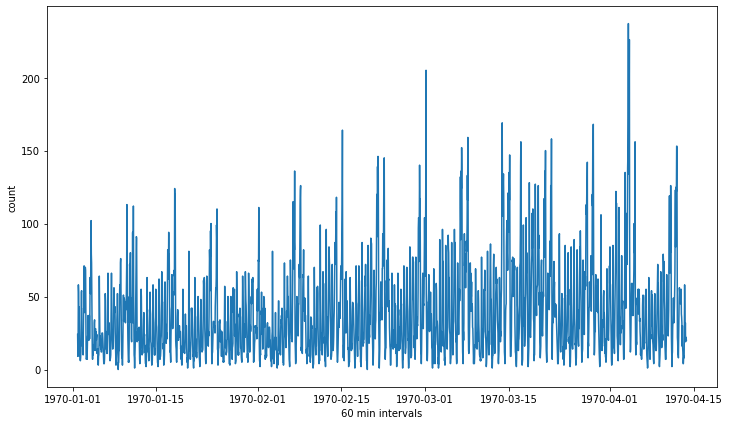

In [11]:
# 60-min interval
df_60_min= df_login.resample('60T').sum()

plt.figure(figsize=(12,7))
plt.plot(df_60_min)
plt.xlabel('60 min intervals')
plt.ylabel('count')

Text(0, 0.5, 'count')

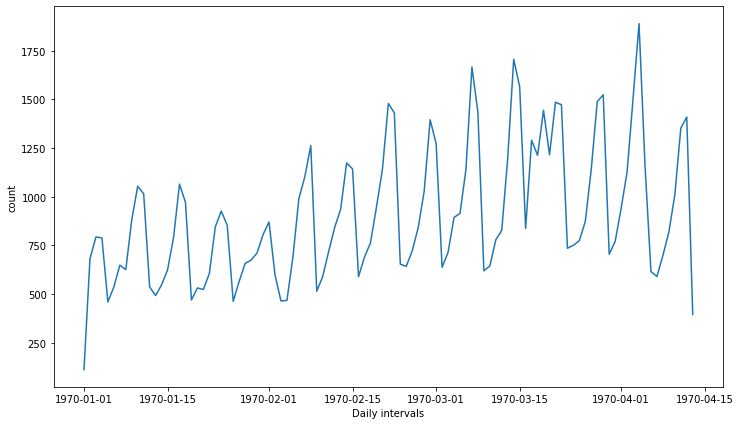

In [12]:
# Daily interval
day = df_login.resample('D').sum()
plt.figure(figsize=(12,7))
plt.plot(day)
plt.xlabel('Daily intervals')
plt.ylabel('count')

Text(0, 0.5, 'count')

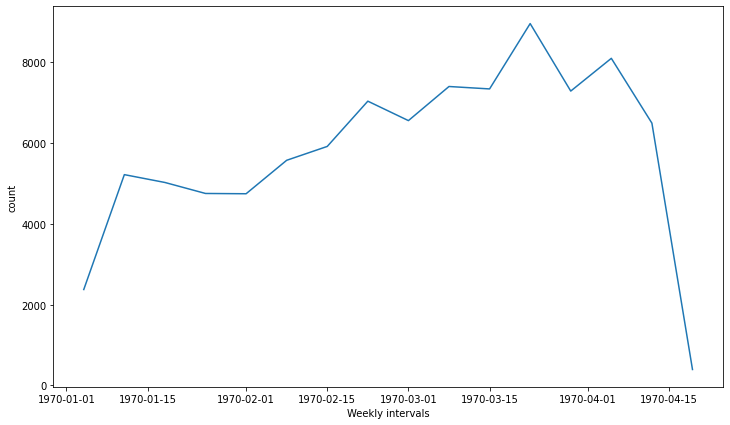

In [13]:
# Weekly interval
week = df_login.resample('W').sum()
plt.figure(figsize=(12,7))
plt.plot(week)
plt.xlabel('Weekly intervals')
plt.ylabel('count')

Text(0, 0.5, 'count')

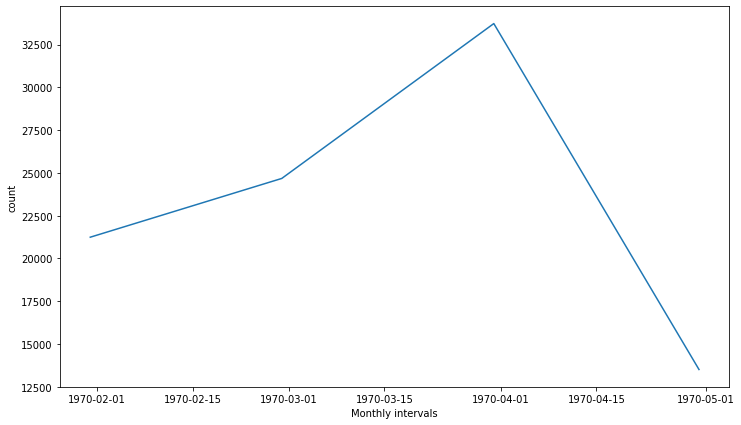

In [14]:
# Monthly interval
month = df_login.resample('M').sum()
plt.figure(figsize=(12,7))
plt.plot(month)
plt.xlabel('Monthly intervals')
plt.ylabel('count')

In [15]:
df_ultimate = pd.read_json('ultimate_data_challenge.json')

In [16]:
df_ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [17]:
df_ultimate.shape

(50000, 12)

In [18]:
df_ultimate.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [19]:
df_ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [20]:
df_ultimate['avg_rating_by_driver'].fillna(df_ultimate['avg_rating_by_driver'].median(), inplace=True)
df_ultimate['avg_rating_of_driver'].fillna(df_ultimate['avg_rating_of_driver'].median(), inplace=True)

In [21]:
df_ultimate['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [22]:
df_ultimate['phone'].fillna('iPhone', inplace=True)

In [23]:
df_ultimate.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [24]:
# datetime objects
df_ultimate.signup_date = pd.to_datetime(df_ultimate.signup_date)
df_ultimate.last_trip_date = pd.to_datetime(df_ultimate.last_trip_date)

In [25]:
df_ultimate.last_trip_date.max()

Timestamp('2014-07-01 00:00:00')

In [26]:
df_ultimate.last_trip_date.min()

Timestamp('2014-01-01 00:00:00')

In [27]:
cutoff = df_ultimate.last_trip_date.max() + pd.Timedelta('-30days')
cutoff

Timestamp('2014-06-01 00:00:00')

In [28]:
# active user column which consists of 1 and 0
df_ultimate['active_user'] = np.where(df_ultimate['last_trip_date']>=cutoff, 1, 0)

In [29]:
fraction = df_ultimate.active_user.sum() / len(df_ultimate)
print(fraction)

0.37608


In [31]:
df_ultimate['six_months'] = df_ultimate.signup_date.apply(pd.DateOffset(180))

/Users/tddagdas/opt/anaconda3/envs/Main/lib/python3.7/site-packages/pandas/core/series.py:4138: FutureWarning: DateOffset.__call__ is deprecated and will be removed in a future version.  Use `offset + other` instead.
  mapped = lib.map_infer(values, f, convert=convert_dtype)


In [32]:
df_ultimate = df_ultimate.assign(is_active = (df_ultimate.six_months.apply(pd.DateOffset(-30)) <= df_ultimate.last_trip_date))
df_ultimate.is_active = df_ultimate.is_active.replace({True:1,False:0})


In [34]:
df_ultimate.is_active.value_counts()

0    37286
1    12714
Name: is_active, dtype: int64

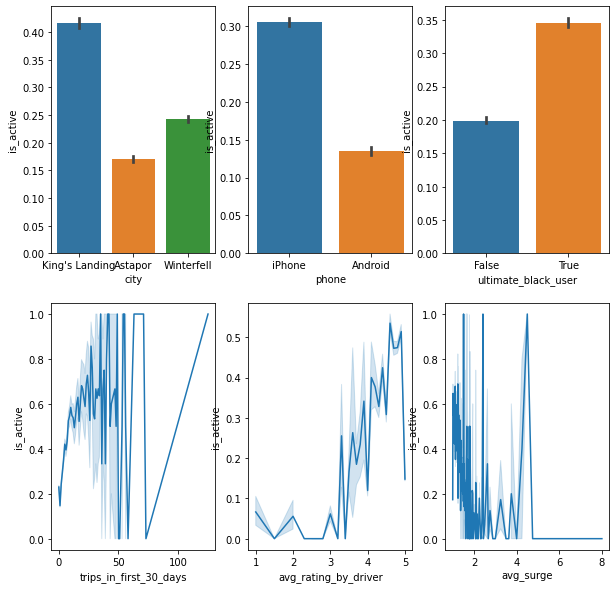

In [41]:

fig,ax = plt.subplots(2,3, figsize=(10,10))

sns.barplot(x='city',y='is_active',data=df_ultimate,ax = ax[0,0]);
sns.barplot(x='phone',y='is_active',data=df_ultimate,ax = ax[0,1]);
sns.barplot(x='ultimate_black_user',y='is_active',data=df_ultimate,ax = ax[0,2]);
sns.lineplot(x='trips_in_first_30_days',y='is_active',data=df_ultimate,ax = ax[1,0]);
sns.lineplot(x='avg_rating_by_driver',y='is_active',data=df_ultimate,ax = ax[1,1]);
sns.lineplot(x='avg_surge',y='is_active',data=df_ultimate,ax = ax[1,2]);


In [42]:
# dropping columns
df_ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user,six_months,is_active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1,2014-07-24,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0,2014-07-28,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0,2014-07-05,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1,2014-07-09,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0,2014-07-26,0


In [43]:
# Predictive model

# dropping columns
df_ultimate.drop(['signup_date','last_trip_date','six_months','active_user', 'ultimate_black_user'],axis=1,inplace=True)

In [44]:
# transform all the values to numeric
df_ultimate = pd.get_dummies(df_ultimate)

In [46]:

X = df_ultimate.drop(['is_active'],axis=1)
y = df_ultimate.is_active

from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
print('RF')
print(cm)

RF
[[10709  1657]
 [ 2181  1953]]


In [49]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [50]:
norm = MinMaxScaler()
norm.fit(X_train)
norm.transform(X_train)
norm.transform(X_test)

array([[0.        , 1.        , 0.02428571, ..., 0.        , 0.        ,
        1.        ],
       [0.008     , 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.008     , 0.975     , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.016     , 0.75      , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.008     , 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.008     , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [51]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_predict_test = rf.predict(X_test)
y_predict_train = rf.predict(X_train)

In [52]:
print(accuracy_score(y_test,y_predict_test))

0.7664242424242425


In [53]:
print(accuracy_score(y_train,y_predict_train))

0.9971940298507462
